C:\Users\dashtianh\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\dashtianh\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\dashtianh\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\dashtianh\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


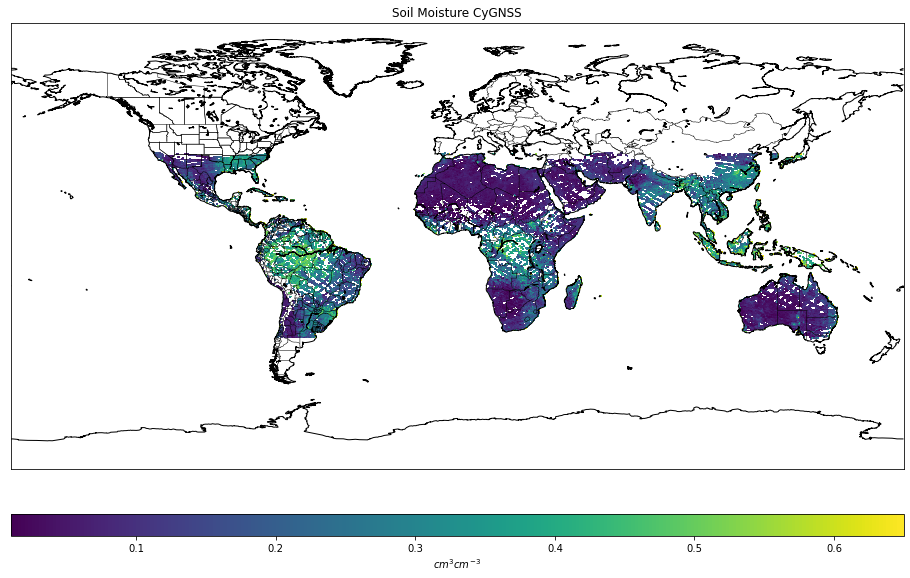

In [1]:
from glob import glob
#import rasterio
from xarray import open_mfdataset
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import pandas as pd
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
%matplotlib inline
import math
filterwarnings('ignore')

example_d = "path\\ucar_*.nc"
example_f = sorted(glob(example_d))


xds = open_mfdataset(example_f, combine="by_coords",  parallel=True)
latitudes = xds['latitude'].values
longitudes = xds['longitude'].values
centre_lat = 30.311826
centre_lon = -98.775934
global_sm = xds['SM_daily'].values
global_sm.shape

# Get L3 sm values for days which have CYGNSS data
l3_lat = 228
l3_lon = 107
l3_sm = []
for i in range(0,360):
    l3_sm.append((global_sm[i][l3_lat][l3_lon]))
l3_daily_sm = np.array(l3_sm)

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(16, 12), edgecolor='w')

centre_lat = 30.311826
centre_lon = -98.775934
m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='cyl',\
            lat_ts=0,lat_0=0.0,lon_0=0.0) 
xi, yi = longitudes[1,:,:], latitudes[1,:,:]
#global_sm[time,lat,lon]
cs = m.pcolor(xi,yi,global_sm[1,:,:], latlon = True)

m.drawcoastlines()
m.drawstates()
m.drawcountries()
# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label('$cm^3 cm^{-3}$')

# Add Title
plt.title('Soil Moisture CyGNSS')

plt.show()